In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/datagy/pivot_table_pandas/raw/master/sample_pivot.xlsx'
df = pd.read_excel(url)

In [3]:
df.head()

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425
3,2020-02-28,East,Children's Clothing,26.0,832
4,2020-03-19,West,Women's Clothing,3.0,33


In [4]:
pv1 = pd.pivot_table(df, index='Region')

In [5]:
pv1

,Sales,Units
Region,,
East,408.182482,19.732360
North,438.924051,19.202643
South,432.956204,20.423358
West,452.029412,19.294118


In [6]:
pv2 = pd.pivot_table(df, index='Region', values='Sales')

In [7]:
pv2

,Sales
Region,
East,408.182482
North,438.924051
South,432.956204
West,452.029412


Note: mean values provided by default.

Additional Arguments

In [8]:
pv3 = pd.pivot_table(df, index='Region', values='Sales', aggfunc='sum')

In [9]:
pv3

,Sales
Region,
East,167763
North,138700
South,59315
West,61476


What if you want average as well as total?

In [10]:
pv3 = pd.pivot_table(df, index='Region', values='Sales', aggfunc=['sum', 'mean'])

In [11]:
pv3

,sum,mean
,Sales,Sales
Region,,
East,167763,408.182482
North,138700,438.924051
South,59315,432.956204
West,61476,452.029412


In [13]:
pv3.index

Index(['East', 'North', 'South', 'West'], dtype='object', name='Region')

What if we want to break out both by Region as well as type of sale? 

In [15]:
pv4 = pd.pivot_table(df, index='Region', columns='Type', values='Sales')

In [16]:
pv4

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,405.743363,423.647541,399.028409
North,438.894118,449.157303,432.528169
South,412.666667,475.435897,418.924528
West,480.523810,465.292683,419.188679


In [17]:
pv5 = pd.pivot_table(df, index='Region', columns='Type', values='Units', 
                     fill_value=0)

In [18]:
pv5

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,20.513274,19.836066,19.159091
North,20.741176,0.000000,18.281690
South,22.600000,18.589744,19.924528
West,18.785714,20.219512,18.981132


Add column and row totals (using *margins* argument).  
Say we want to know the total sales that occurred across each region, as well as across the different types of clothing that were sold within the different categories.

In [21]:
# pv6 = pd.pivot_table(df, index='Region', columns='Type', values='Sales', 
#                      aggfunc='sum', margins=False)
# # Note: no 'All' column

In [25]:
pv6 = pd.pivot_table(df, index='Region', columns='Type', values='Sales', 
                     aggfunc='sum', margins=True)
# margins=True adds an 'All' column

In [26]:
pv6

Type,Children's Clothing,Men's Clothing,Women's Clothing,All
Region,,,,
East,45849,51685,70229,167763
North,37306,39975,61419,138700
South,18570,18542,22203,59315
West,20182,19077,22217,61476
All,121907,129279,176068,427254


Rename the margins column using 'margins_name':

In [27]:
pv6 = pd.pivot_table(df, index='Region', columns='Type', values='Sales', 
                     aggfunc='sum', margins=True, margins_name='Total')

In [28]:
pv6

Type,Children's Clothing,Men's Clothing,Women's Clothing,Total
Region,,,,
East,45849,51685,70229,167763
North,37306,39975,61419,138700
South,18570,18542,22203,59315
West,20182,19077,22217,61476
Total,121907,129279,176068,427254


Get the Regions where avg sale price was over 450:

In [30]:
avg_region_price = pd.pivot_table(df, index = 'Region', values = 'Sales')
avg_region_price

,Sales
Region,
East,408.182482
North,438.924051
South,432.956204
West,452.029412


In [31]:
avg_region_price[avg_region_price['Sales'] > 450]

,Sales
Region,
West,452.029412


Show only > 450 -or- < 430:

In [32]:
avg_region_price[(avg_region_price['Sales'] > 450) | (avg_region_price['Sales'] < 430)]

,Sales
Region,
East,408.182482
West,452.029412


Create a MultiIndex pivot table.  
Get sum by Type per Region:

In [33]:
multi_index = pd.pivot_table(df, index = ['Region', 'Type'], 
                             values = 'Sales', aggfunc = 'sum') 
print(multi_index)

                            Sales
Region Type                      
East   Children's Clothing  45849
       Men's Clothing       51685
       Women's Clothing     70229
North  Children's Clothing  37306
       Men's Clothing       39975
       Women's Clothing     61419
South  Children's Clothing  18570
       Men's Clothing       18542
       Women's Clothing     22203
West   Children's Clothing  20182
       Men's Clothing       19077
       Women's Clothing     22217


Add count of sales to that:

In [34]:
multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], 
                                 values = 'Sales', aggfunc = ['sum', len]) 
print(multi_functions)

                              sum   len
                            Sales Sales
Region Type                            
East   Children's Clothing  45849   113
       Men's Clothing       51685   122
       Women's Clothing     70229   176
North  Children's Clothing  37306    85
       Men's Clothing       39975    89
       Women's Clothing     61419   142
South  Children's Clothing  18570    45
       Men's Clothing       18542    39
       Women's Clothing     22203    53
West   Children's Clothing  20182    42
       Men's Clothing       19077    41
       Women's Clothing     22217    53


Adding columns (this was covered in the video).  
Use 'index=':

In [35]:
columns_example = pd.pivot_table(df, index = 'Type', columns = 'Region', 
                                 values = 'Units', aggfunc = 'sum') 
print(columns_example)

Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0


#### Plotting!

<AxesSubplot:xlabel='Type'>

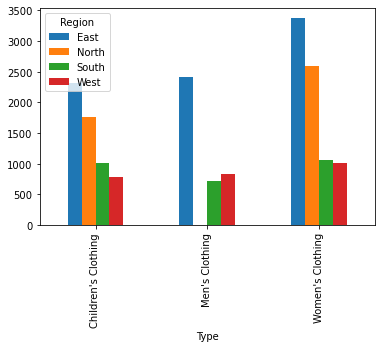

In [36]:
columns_example.plot(kind='bar')

#### Handle Missing Data

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB
None


In [38]:
pd.pivot_table(df, index = 'Type', values = 'Units', 
               columns = 'Region', aggfunc = 'max')

Region,East,North,South,West
Type,,,,
Children's Clothing,35.0,35.0,35.0,34.0
Men's Clothing,35.0,NaN,34.0,35.0
Women's Clothing,35.0,35.0,35.0,33.0


See the NaN??

In [39]:
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', 
               aggfunc = 'max', fill_value = 'N/A')

Region,East,North,South,West
Type,,,,
Children's Clothing,35.0,35,35.0,34.0
Men's Clothing,35.0,N/A,34.0,35.0
Women's Clothing,35.0,35,35.0,33.0


#### Adding Totals for Rows / Cols
Also covered in the video

In [40]:
pd.pivot_table(df, index = 'Type', values = 'Units', columns = 'Region', 
               aggfunc = 'max', fill_value = 'N/A', 
               margins = True, margins_name='Total')

Region,East,North,South,West,Total
Type,,,,,
Children's Clothing,35,35,35,34,35
Men's Clothing,35,N/A,34,35,35
Women's Clothing,35,35,35,33,35
Total,35,35,35,35,35
